# Model Comparison and Confidence Intervals Tutorial

## Outline
1. Block-Bootstrap
2. Model Comparison
3. Evaluate Confidence Intervals

-------

## 1. Block-Bootstrap

Bootrap is a procedure to obtain data with similar characteristics, but different to the original data.

**Bootstrap** - random sampling with replacement.
<img src="pictures/bootstrap_illustration.png" width="900" align="left"/>

**Block-bootstrap** is a bootstrap performed over regions of linkage (e.g. genes). Usually 100 bootstraped data is generated.

We will use a custom script that takes recombination rate as input and performs bootstrap over the regions of 0.5 Morgans length. BE CAREFULL, THIS PROCESS IS VERY TIME-CONSUMING!

In [1]:
%%bash
python scripts/perform_block_bootstrap.py

Usage: scripts/perform_block_bootstrap.py <original_VCF> <popmap> <rec_rate> <output_dir> <n_boots> <easySFS_location> <easySFS_arguments>


In [4]:
%%bash
# mkdir data
# mkdir data/boots
# python scripts/perform_block_bootstrap.py ../2_GADMA_tutorial/data/clouded_leopard_data.vcf ../2_GADMA_tutorial/data/popmap.txt 1e-6 data/boots 100 ../1_easySFS_tutorial/easySFS/easySFS.py "-a --unfolded --proj 14"

We have already run this script for you and you can find `.sfs` files in `data/boots` directory

In [5]:
%%bash
ls ../2_GADMA_tutorial/data/boots

100.sfs
10.sfs
11.sfs
12.sfs
13.sfs
14.sfs
15.sfs
16.sfs
17.sfs
18.sfs
19.sfs
1.sfs
20.sfs
21.sfs
22.sfs
23.sfs
24.sfs
25.sfs
26.sfs
27.sfs
28.sfs
29.sfs
2.sfs
30.sfs
31.sfs
32.sfs
33.sfs
34.sfs
35.sfs
36.sfs
37.sfs
38.sfs
39.sfs
3.sfs
40.sfs
41.sfs
42.sfs
43.sfs
44.sfs
45.sfs
46.sfs
47.sfs
48.sfs
49.sfs
4.sfs
50.sfs
51.sfs
52.sfs
53.sfs
54.sfs
55.sfs
56.sfs
57.sfs
58.sfs
59.sfs
5.sfs
60.sfs
61.sfs
62.sfs
63.sfs
64.sfs
65.sfs
66.sfs
67.sfs
68.sfs
69.sfs
6.sfs
70.sfs
71.sfs
72.sfs
73.sfs
74.sfs
75.sfs
76.sfs
77.sfs
78.sfs
79.sfs
7.sfs
80.sfs
81.sfs
82.sfs
83.sfs
84.sfs
85.sfs
86.sfs
87.sfs
88.sfs
89.sfs
8.sfs
90.sfs
91.sfs
92.sfs
93.sfs
94.sfs
95.sfs
96.sfs
97.sfs
98.sfs
99.sfs
9.sfs


We can draw several of those SFS:

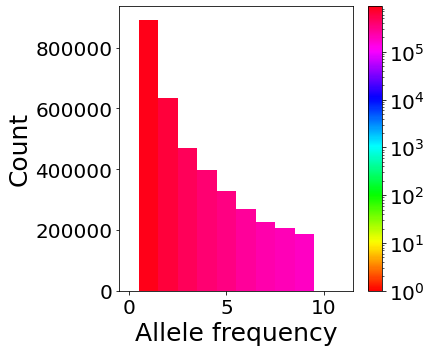

In [6]:
from scripts.draw_sfs import draw_1d_sfs
draw_1d_sfs("../2_GADMA_tutorial/data/boots/1.sfs")

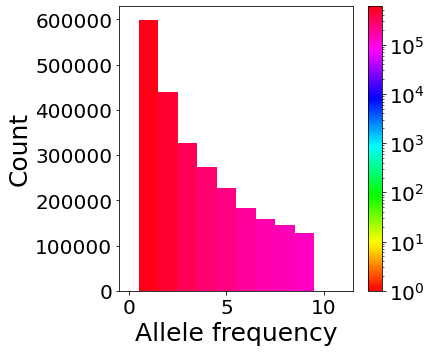

In [7]:
from scripts.draw_sfs import draw_1d_sfs
draw_1d_sfs("../2_GADMA_tutorial/data/boots/2.sfs")

## 1. Model comparison

We can compare models with different numbers of paramters (e.g. one-epoch history, two-epoch history and etc.) using AIC or CLAIC. More information is available [here](https://gadma.readthedocs.io/en/latest/user_manual/input_data/input_data.html#unlinked-snps-aic-and-claic).
- AIC could be used if our SNP's are **unlinked**, independent. It is usually a case of RAD-like data, remember `easySFS` offered us to choose one SNP per RAD locus? That is exactly the way to get set of unlinked SNP's. Another option is to use LD pruning. Both solutions lead to data lost.
- CLAIC [\[Coffman 2016\]](https://doi.org/10.1093/molbev/msv255) is applied when our SNP's are linked (general case). In order to evaluate CLAIC we should provide additional **block-bootstraped** data. Bootstrap should be performed over the regions of linkage (usually genes). A little more about bootstrap will be further. Here we just got some directory with bootstraped data.

In [2]:
%%bash
cat gadma_params_files/params_model_comparison

Input data: ../2_GADMA_tutorial/outputs/easySFS_output/dadi/NN-10.sfs
Output directory: outputs/gadma_outputs/gadma_model_comparison

# We want compare final demographic histories with different
# numbers of epochs using CLAIC
Linked SNP's : True
Directory with bootstrap: ../2_GADMA_tutorial/data/boots

Mutation rate: 1.554e-8
Sequence length: 118000000
Time for generation: 7

Engine: moments

Initial structure: 1
Final structure: 3

Number of repeats: 8
Number of processes: 4


In [2]:
%%bash
#mkdir outputs
#mkdir outputs/gadma_outputs
rm -rf outputs/gadma_outputs/gadma_model_comparison
gadma -p gadma_params_files/params_model_comparison

Data reading
Number of populations: 1
Projections: [10]
Population labels: ['NN']
Outgroup: True
--Successful data reading (0.00 s)--

--Successful arguments parsing--

Bootstrap data reading
Number of files found: 100
--Successful bootstrap data reading (0.01 s)--



Parameters of launch are saved in output directory: /home/enoskova/Workspace/GADMA_workshops/2025-12-Demographic_Inference_Worshop/tutorials/3_Model_Selection_tutorial/outputs/gadma_outputs/gadma_model_comparison/params_file
All output is saved in output directory: /home/enoskova/Workspace/GADMA_workshops/2025-12-Demographic_Inference_Worshop/tutorials/3_Model_Selection_tutorial/outputs/gadma_outputs/gadma_model_comparison/GADMA.log

--Start pipeline--
Run launch number 1
Run launch number 2
Run launch number 3
Run launch number 4



[000:01:00]
All best by log-likelihood models
Number	log-likelihood	Model	Units
Run 1	-315.05	 [Nanc = 341438] [ [ 106114.559(t1), [36571.15(nu11)], [Sud(dyn11)] ] ]	(theta =  2504413.01)	physical, time in years
Run 2	-321.16	 [Nanc = 341306] [ [ 3893172.485(t1), [341647.632(nu11)], [Sud(dyn11)] ],	[ 234184.81(t2), [25421.422(nu21)], [Exp(dyn21)] ] ]	(theta =  2503439.69)	physical, time in years
Run 3	-335.28	 [Nanc = 341794] [ [ 197725.377(t1), [178421.793(nu11)], [Lin(dyn11)] ],	[ 197725.377(t2), [15199.741(nu21)], [Lin(dyn21)] ] ]	(theta =  2507021.88)	physical, time in years
Run 4	-468.64	 [Nanc = 343654] [ [ 142695.89(t1), [180289.568(nu11)], [Lin(dyn11)] ],	[ 287333.695(t2), [30203.516(nu21)], [Lin(dyn21)] ] ]	m	(theta =  2520667.88)	physical, time in years

You can find the picture and the Python code of the best model in the output directory.

All best by CLAIC score models
Number	log-likelihood	CLAIC score	Model	Units
Run 2	-321.38	645.93 (eps=1.0e-05)	 [Nanc = 341518] [ [ 23

Finish genetic algorithm number 2
Run launch number 6


Finish genetic algorithm number 4
Run launch number 7


Finish genetic algorithm number 1
Run launch number 8



[000:02:00]
All best by log-likelihood models
Number	log-likelihood	Model	Units
Run 1	-314.11	 [Nanc = 341182] [ [ 102855.809(t1), [35701.452(nu11)], [Sud(dyn11)] ] ]	(theta =  2502536.34)	physical, time in years
Run 6	-317.51	 [Nanc = 340803] [ [ 88027.152(t1), [31302.542(nu11)], [Sud(dyn11)] ] ]	(theta =  2499755.36)	physical, time in years
Run 2	-321.16	 [Nanc = 341306] [ [ 3893172.485(t1), [341647.632(nu11)], [Sud(dyn11)] ],	[ 234184.81(t2), [25421.422(nu21)], [Exp(dyn21)] ] ]	f	(theta =  2503439.69)	physical, time in years
Run 3	-335.28	 [Nanc = 341794] [ [ 197725.377(t1), [178421.793(nu11)], [Lin(dyn11)] ],	[ 197725.377(t2), [15199.741(nu21)], [Lin(dyn21)] ] ]	f	(theta =  2507021.88)	physical, time in years
Run 7	-365.85	 [Nanc = 343182] [ [ 474606.347(t1), [21727.559(nu11)], [Lin(dyn11)] ] ]	(theta =  2517202.22)	physical, time in years
Run 4	-409.46	 [Nanc = 342896] [ [ 178890.22(t1), [159686.535(nu11)], [Lin(dyn11)] ],	[ 234987.848(t2), [26902.024(nu21)], [Lin(dyn21)] ] ]	f	(

Finish genetic algorithm number 6
Finish genetic algorithm number 7

[000:03:00]
All best by log-likelihood models
Number	log-likelihood	Model	Units
Run 1	-314.11	 [Nanc = 341182] [ [ 102855.809(t1), [35701.452(nu11)], [Sud(dyn11)] ] ]	(theta =  2502536.34)	physical, time in years
Run 6	-317.51	 [Nanc = 340811] [ [ 5.213(t1), [18960.074(nu11)], [Sud(dyn11)] ],	[ 88029.136(t2), [31303.247(nu21)], [Sud(dyn21)] ] ]	f	(theta =  2499811.71)	physical, time in years
Run 2	-321.16	 [Nanc = 341306] [ [ 3893172.485(t1), [341647.632(nu11)], [Sud(dyn11)] ],	[ 234184.81(t2), [25421.422(nu21)], [Exp(dyn21)] ] ]	f	(theta =  2503439.69)	physical, time in years
Run 3	-335.28	 [Nanc = 341794] [ [ 197725.377(t1), [178421.793(nu11)], [Lin(dyn11)] ],	[ 197725.377(t2), [15199.741(nu21)], [Lin(dyn21)] ] ]	f	(theta =  2507021.88)	physical, time in years
Run 8	-336.07	 [Nanc = 341707] [ [ 0.902(t1), [341707.758(nu11)], [Sud(dyn11)] ],	[ 390334.891(t2), [14770.461(nu21)], [Lin(dyn21)] ] ]	(theta =  2506385.28)	

Run 6	-317.51	638.21 (eps=1.0e-05)	 [Nanc = 340811] [ [ 5.213(t1), [18960.074(nu11)], [Sud(dyn11)] ],	[ 88029.136(t2), [31303.247(nu21)], [Sud(dyn21)] ] ]	(theta =  2499811.71)	physical, time in years
Run 6	-317.51	638.21 (eps=1.0e-05)	 [Nanc = 340811] [ [ 5.213(t1), [18960.074(nu11)], [Sud(dyn11)] ],	[ 88029.136(t2), [31303.247(nu21)], [Sud(dyn21)] ] ]	f	(theta =  2499811.71)	physical, time in years
Run 1	-314.12	643.03 (eps=1.0e-05)	 [Nanc = 341182] [ [ 51427.872(t1), [35701.43(nu11)], [Sud(dyn11)] ],	[ 51427.872(t2), [35701.43(nu21)], [Sud(dyn21)] ] ]	(theta =  2502534.75)	physical, time in years
Run 1	-314.12	643.03 (eps=1.0e-05)	 [Nanc = 341182] [ [ 51427.872(t1), [35701.43(nu11)], [Sud(dyn11)] ],	[ 51427.872(t2), [35701.43(nu21)], [Sud(dyn21)] ] ]	f	(theta =  2502534.75)	physical, time in years
Run 1	-314.11	643.08 (eps=1.0e-05)	 [Nanc = 341182] [ [ 102855.809(t1), [35701.452(nu11)], [Sud(dyn11)] ] ]	(theta =  2502536.34)	physical, time in years
Run 2	-321.38	645.93 (eps=1.0e-05)

Run 3	-335.39	671.29 (eps=1.0e-05)	 [Nanc = 341800] [ [ 395457.554(t1), [15184.81(nu11)], [Lin(dyn11)] ] ]	(theta =  2507064.98)	physical, time in years
Run 8	-336.07	674.61 (eps=1.0e-05)	 [Nanc = 341707] [ [ 0.902(t1), [341707.758(nu11)], [Sud(dyn11)] ],	[ 390334.891(t2), [14770.461(nu21)], [Lin(dyn21)] ] ]	(theta =  2506385.28)	physical, time in years
Run 8	-336.07	674.61 (eps=1.0e-05)	 [Nanc = 341707] [ [ 0.902(t1), [341707.758(nu11)], [Sud(dyn11)] ],	[ 390334.891(t2), [14770.461(nu21)], [Lin(dyn21)] ] ]	f	(theta =  2506385.28)	physical, time in years
Run 8	-336.13	674.76 (eps=1.0e-05)	 [Nanc = 341761] [ [ 390506.558(t1), [14758.01(nu11)], [Lin(dyn11)] ] ]	(theta =  2506778.36)	physical, time in years
Run 3	-335.28	686.83 (eps=1.0e-05)	 [Nanc = 341794] [ [ 197725.377(t1), [178421.793(nu11)], [Lin(dyn11)] ],	[ 197725.377(t2), [15199.741(nu21)], [Lin(dyn21)] ] ]	(theta =  2507021.88)	physical, time in years
Run 3	-335.28	686.83 (eps=1.0e-05)	 [Nanc = 341794] [ [ 197725.377(t1), [17842

Final demographic history (`outputs/gadma_outputs/gadma_model_comparison/best_claic_model.png` file):
<img src="outputs/gadma_outputs/gadma_model_comparison/best_claic_model.png" width="900" align="left"/>

----
## 8. Evaluate Confidence Intervals (CI) for the Final Model

For our final model we want to get confidence intervals for its parameters. We will also use block-boostraped data.

In [ ]:
%%bash
# If you want to start from scratch remove the output directory
rm -rf confidence_intervals
gadma-run_ls_on_boot_data -b ../2_GADMA_tutorial/data/boots -d outputs/gadma_outputs/gadma_model_comparison/best_claic_model_moments_code.py\
    -o confidence_intervals --opt log -e moments

In [4]:
%%bash
python scripts/translate_units.py confidence_intervals/result_table.csv 7.33488
cat confidence_intervals/result_table_translated.csv

,Nanc,t1,nu11
94.sfs,488493.2228330445,19001.87782574937,44867.68387585137
71.sfs,494666.3819146283,16729.122904702548,43573.18962956763
84.sfs,128519.06456496938,5270.2464974427185,11815.59471977523
72.sfs,461058.0268175107,17934.677261964203,42347.784633937634
88.sfs,434878.63752500934,15833.150074568472,39983.294679276696
93.sfs,253359.1943892878,9368.364147901484,23269.849766933326
52.sfs,320360.9561505183,10836.495916513999,27672.966915520774
33.sfs,271497.32222931925,7686.725928425766,19304.769425925137
67.sfs,109011.36989384869,6967.689875880247,14546.033803146394
40.sfs,703692.0043381342,25965.502386433338,64633.50753056109
4.sfs,287021.12868180167,11154.787392587574,26387.793043192745
64.sfs,208489.22662890522,6213.207871828259,17130.195821969282
89.sfs,526200.1271527321,19416.2368949705,48331.030722591444
53.sfs,606319.1325771745,22099.63717253847,55745.700791487405
98.sfs,360009.02810914925,13283.958352343225,33066.52070211921
87.sfs,430730.25498725724,15893.498000307753,395

The last argument (7.33488) is called theta0 and it is equal to $4*\mu*L$, where $\mu$ is mutation rate and $L$ is the sequence length from GADMA. For our cloded leopard data we have $\mu = 1.554 \times 10^{-8}$ and $L=118{,}000{,}000$.

In [5]:
%%bash
python scripts/translate_units.py

Usage: scripts/translate_units.py <input_file.csv> <theta0>


In [6]:
%%bash
gadma-get_confidence_intervals confidence_intervals/result_table_translated.csv

Nanc:	41920.76150	725629.55804	data does not look normal (reject H0) p-value=2.81e-01
t1:	1320.55313	26470.58014	data does not look normal (reject H0) p-value=2.46e-01
nu11:	3266.44730	66227.36371	data does not look normal (reject H0) p-value=3.21e-01


### Another way to evaluate CI's

There is a method from [\[Coffman 2016\]](https://doi.org/10.1093/molbev/msv255) that also allows to estimate confidence intervals for the parameters.
- Estimates ancertancy using Godambe Information Matrix.
- Requires bootstrap data.
- Does NOT require the whole machinery we just used.
- However, there is no universal script to use it.
- Provides different confidence intervals.

Example script for specific model and data could be found [here](https://github.com/pblischak/inbreeding-sfs/blob/master/data/cabbage/run_cabbage_godambe_3epoch_noF.py). You can use it for your model.